<a href="https://colab.research.google.com/github/swjh9523/KaggleStruggle/blob/main/Kaggle_Loan_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 캐글 대출고객 분류분석


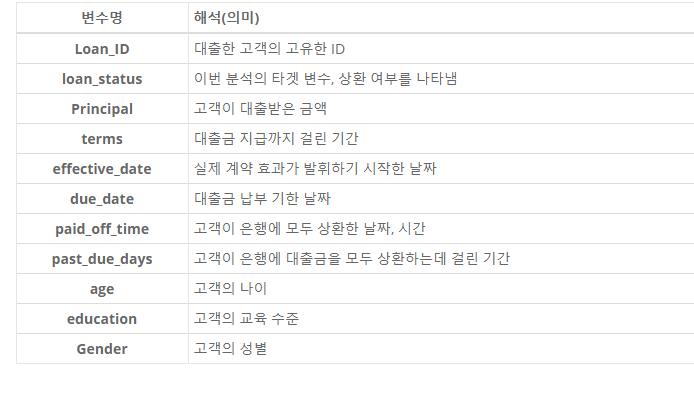

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
import missingno

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


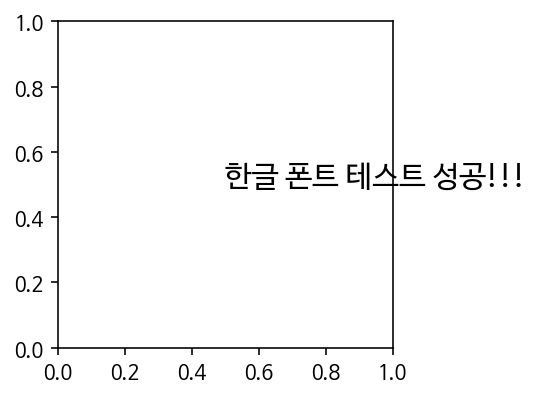

In [1]:
# 그래프 한글폰트 사용설정 in Colab
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '/content/drive/My Drive/파이썬/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [4]:
df = pd.read_csv('/content/drive/MyDrive/데이터파일/Loan payments data.csv')

In [11]:
from sklearn.preprocessing import LabelEncoder

df.head(1)



ValueError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [ ]:
# 결측치 확인
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [ ]:
# 결측치가 있는 컬럼 모아보기

df[['paid_off_time','past_due_days']]

,paid_off_time,past_due_days
0,9/14/2016 19:31,NaN
1,10/7/2016 9:00,NaN
2,9/25/2016 16:58,NaN
3,9/22/2016 20:00,NaN
4,9/23/2016 21:36,NaN
...,...,...
495,10/14/2016 19:08,3.0
496,10/10/2016 20:02,14.0
497,9/29/2016 11:49,3.0
498,11/11/2016 22:40,1.0


In [12]:
# 분석에 불필요한 컬럼 제거
df.drop(['Loan_ID','paid_off_time','past_due_days'],axis=1, inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female


In [ ]:
import datetime as dt

df['effective_date'].astype('datetime64')

0     2016-09-08
1     2016-09-08
2     2016-09-08
3     2016-09-08
4     2016-09-09
         ...    
495   2016-09-12
496   2016-09-12
497   2016-09-12
498   2016-09-12
499   2016-09-12
Name: effective_date, Length: 500, dtype: datetime64[ns]

In [ ]:
# 개별 유니크 값 확인

print(df['terms'].unique())
print('\n',df['Principal'].unique())
print('\n',df['effective_date'].unique())
print('\n',df['due_date'].unique())
print('\n',df['education'].unique())

[30 15  7]

 [1000  300  800  900  700  500]

 ['9/8/2016' '9/9/2016' '9/10/2016' '9/11/2016' '9/12/2016' '9/13/2016'
 '9/14/2016']

 ['10/7/2016' '9/22/2016' '10/8/2016' '9/15/2016' '9/24/2016' '9/16/2016'
 '10/9/2016' '10/10/2016' '9/25/2016' '9/17/2016' '11/9/2016' '10/25/2016'
 '9/18/2016' '9/26/2016' '10/26/2016' '10/11/2016' '11/10/2016'
 '9/19/2016' '10/12/2016' '9/27/2016' '9/28/2016' '10/13/2016'
 '11/12/2016' '9/23/2016' '11/7/2016']

 ['High School or Below' 'Bechalor' 'college' 'Master or Above']


In [ ]:
df['due_date'] = df['due_date'].astype('datetime64')
df['effective_date'] = df['effective_date'].astype('datetime64')
df['date'] = df['due_date'].astype('datetime64') - df['effective_date'].astype('datetime64')
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,date
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,29 days
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,29 days
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,29 days
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,14 days
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,29 days


# EDA

* loan_status
  - 정해진 기간 내에 대출금을 모두 상환하는데 성공한 고객, 실패한 고객

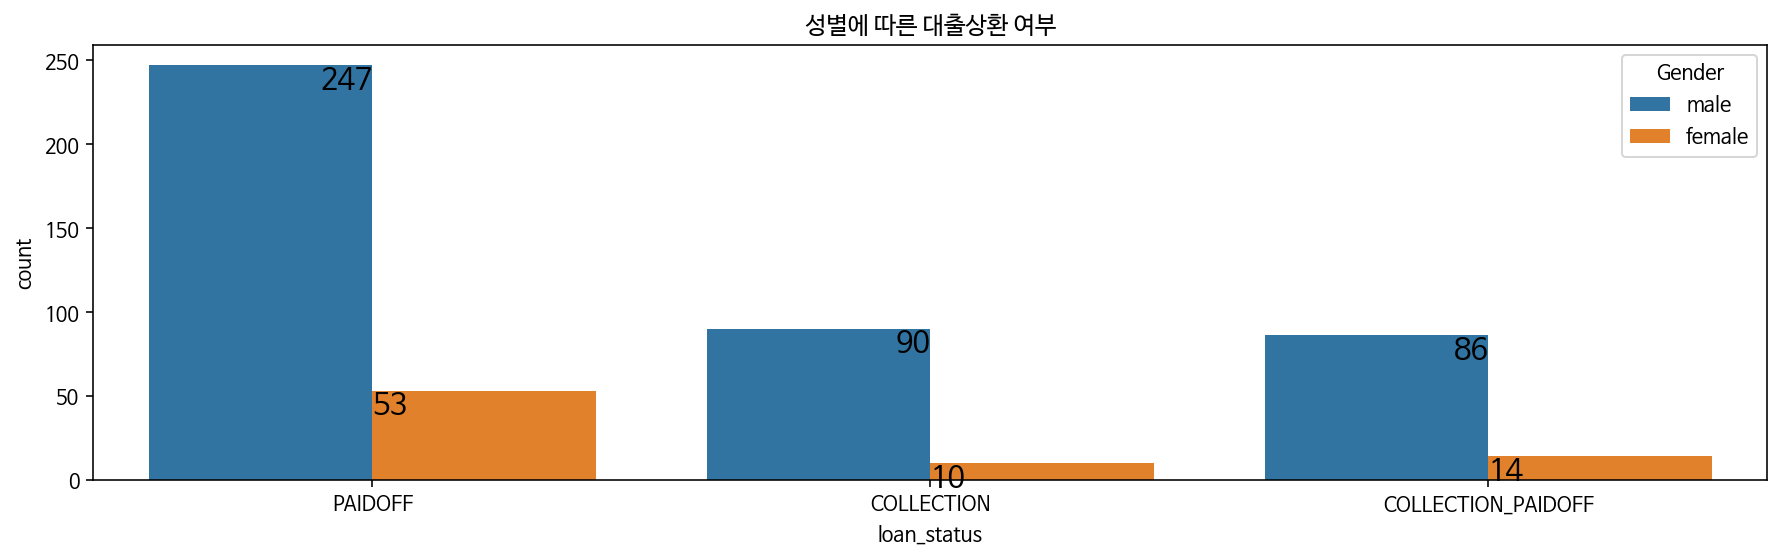

In [ ]:
# 데이터레이블 표시를 위한 연산
table_df = df.groupby(['loan_status','Gender'])['loan_status'].count().unstack().reset_index()
table_df.columns = ['loan_stat', 'F','M']
table_df.sort_values(ascending=False, by='M',inplace=True)

# 시각화
plt.figure(figsize=(15,4))
plt.title('성별에 따른 대출상환 여부')
g = sns.countplot(data=df, x='loan_status', hue='Gender')

index_no = 0
for i, val in table_df.iterrows():
  Male = val["M"]
  Female = val['F']
  g.text(x=index_no, y=Male, s=Male, horizontalalignment='right',verticalalignment='top',fontsize=15)
  g.text(x=index_no, y=Female, s=Female, horizontalalignment='left', verticalalignment='top',fontsize=15)
  index_no = index_no + 1

   Principal  freq
0       1000   377
1        800   111
2        300     6
3        500     3
4        900     2
5        700     1


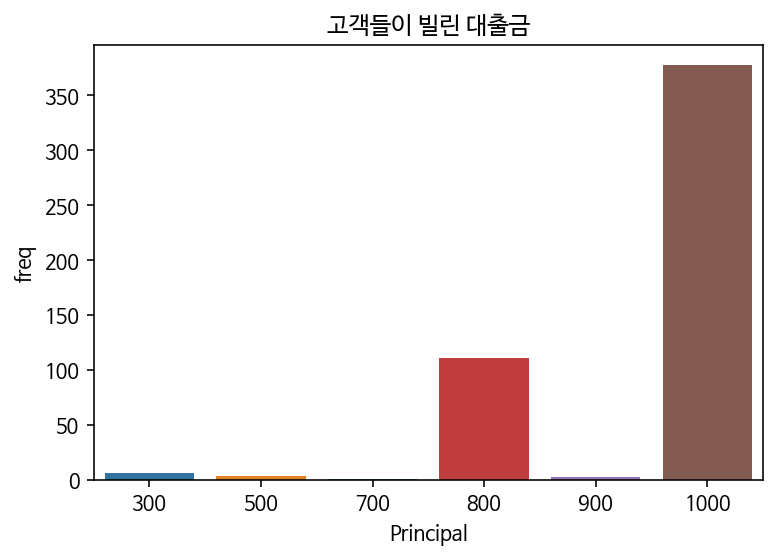

In [ ]:
# 대출금별로 그룹화하고 빈도수를 구하여 막대그래프로 시각화.

df_Principal = df['Principal'].value_counts().reset_index()
df_Principal.columns = ['Principal', 'freq']
print(df_Principal)
plt.title('고객들이 빌린 대출금')
gg = sns.barplot(data=df_Principal, x='Principal', y='freq')


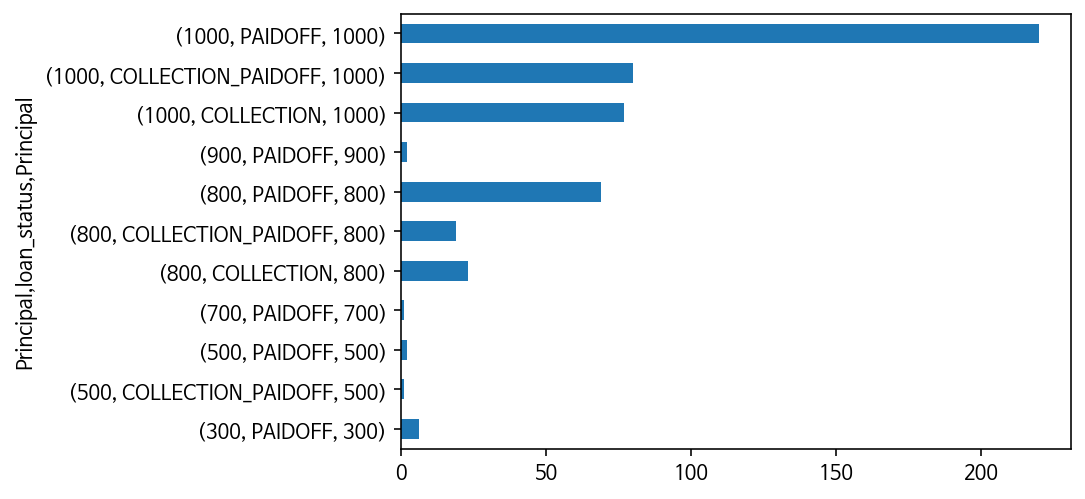

In [ ]:
# 대출금별로 상환에 성공한 고객들과 실패한 고객들의 빈도수와 비율을 한 화면에 같이 plotting 해보도록 하겠습니다.
# df_31["브랜드명"].value_counts(normalize=True).plot.barh()

# df['Principal'].value_counts(normalize=True)

df.groupby(['Principal','loan_status'])['Principal'].value_counts().plot.barh()

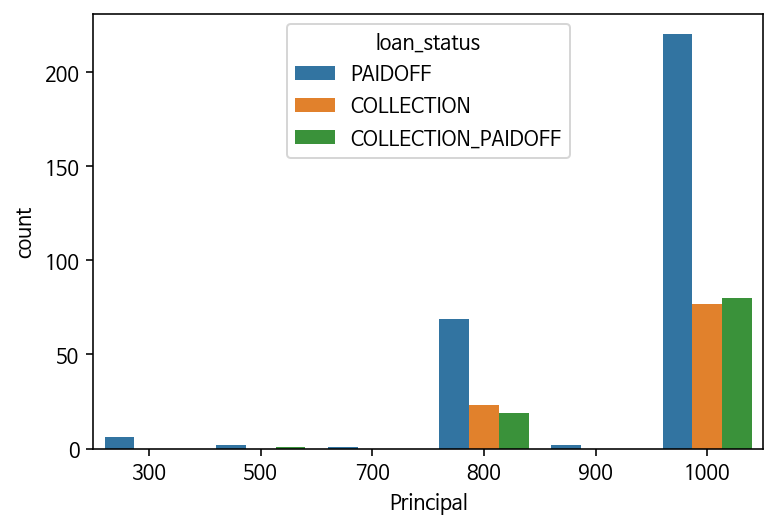

In [ ]:
# df.groupby(['Principal'])['loan_status'].value_counts(normalize=True).plot.barh()
sns.countplot(data=df, x='Principal', hue='loan_status')

In [ ]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,date
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,29 days
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,29 days
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,29 days
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,14 days
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,29 days


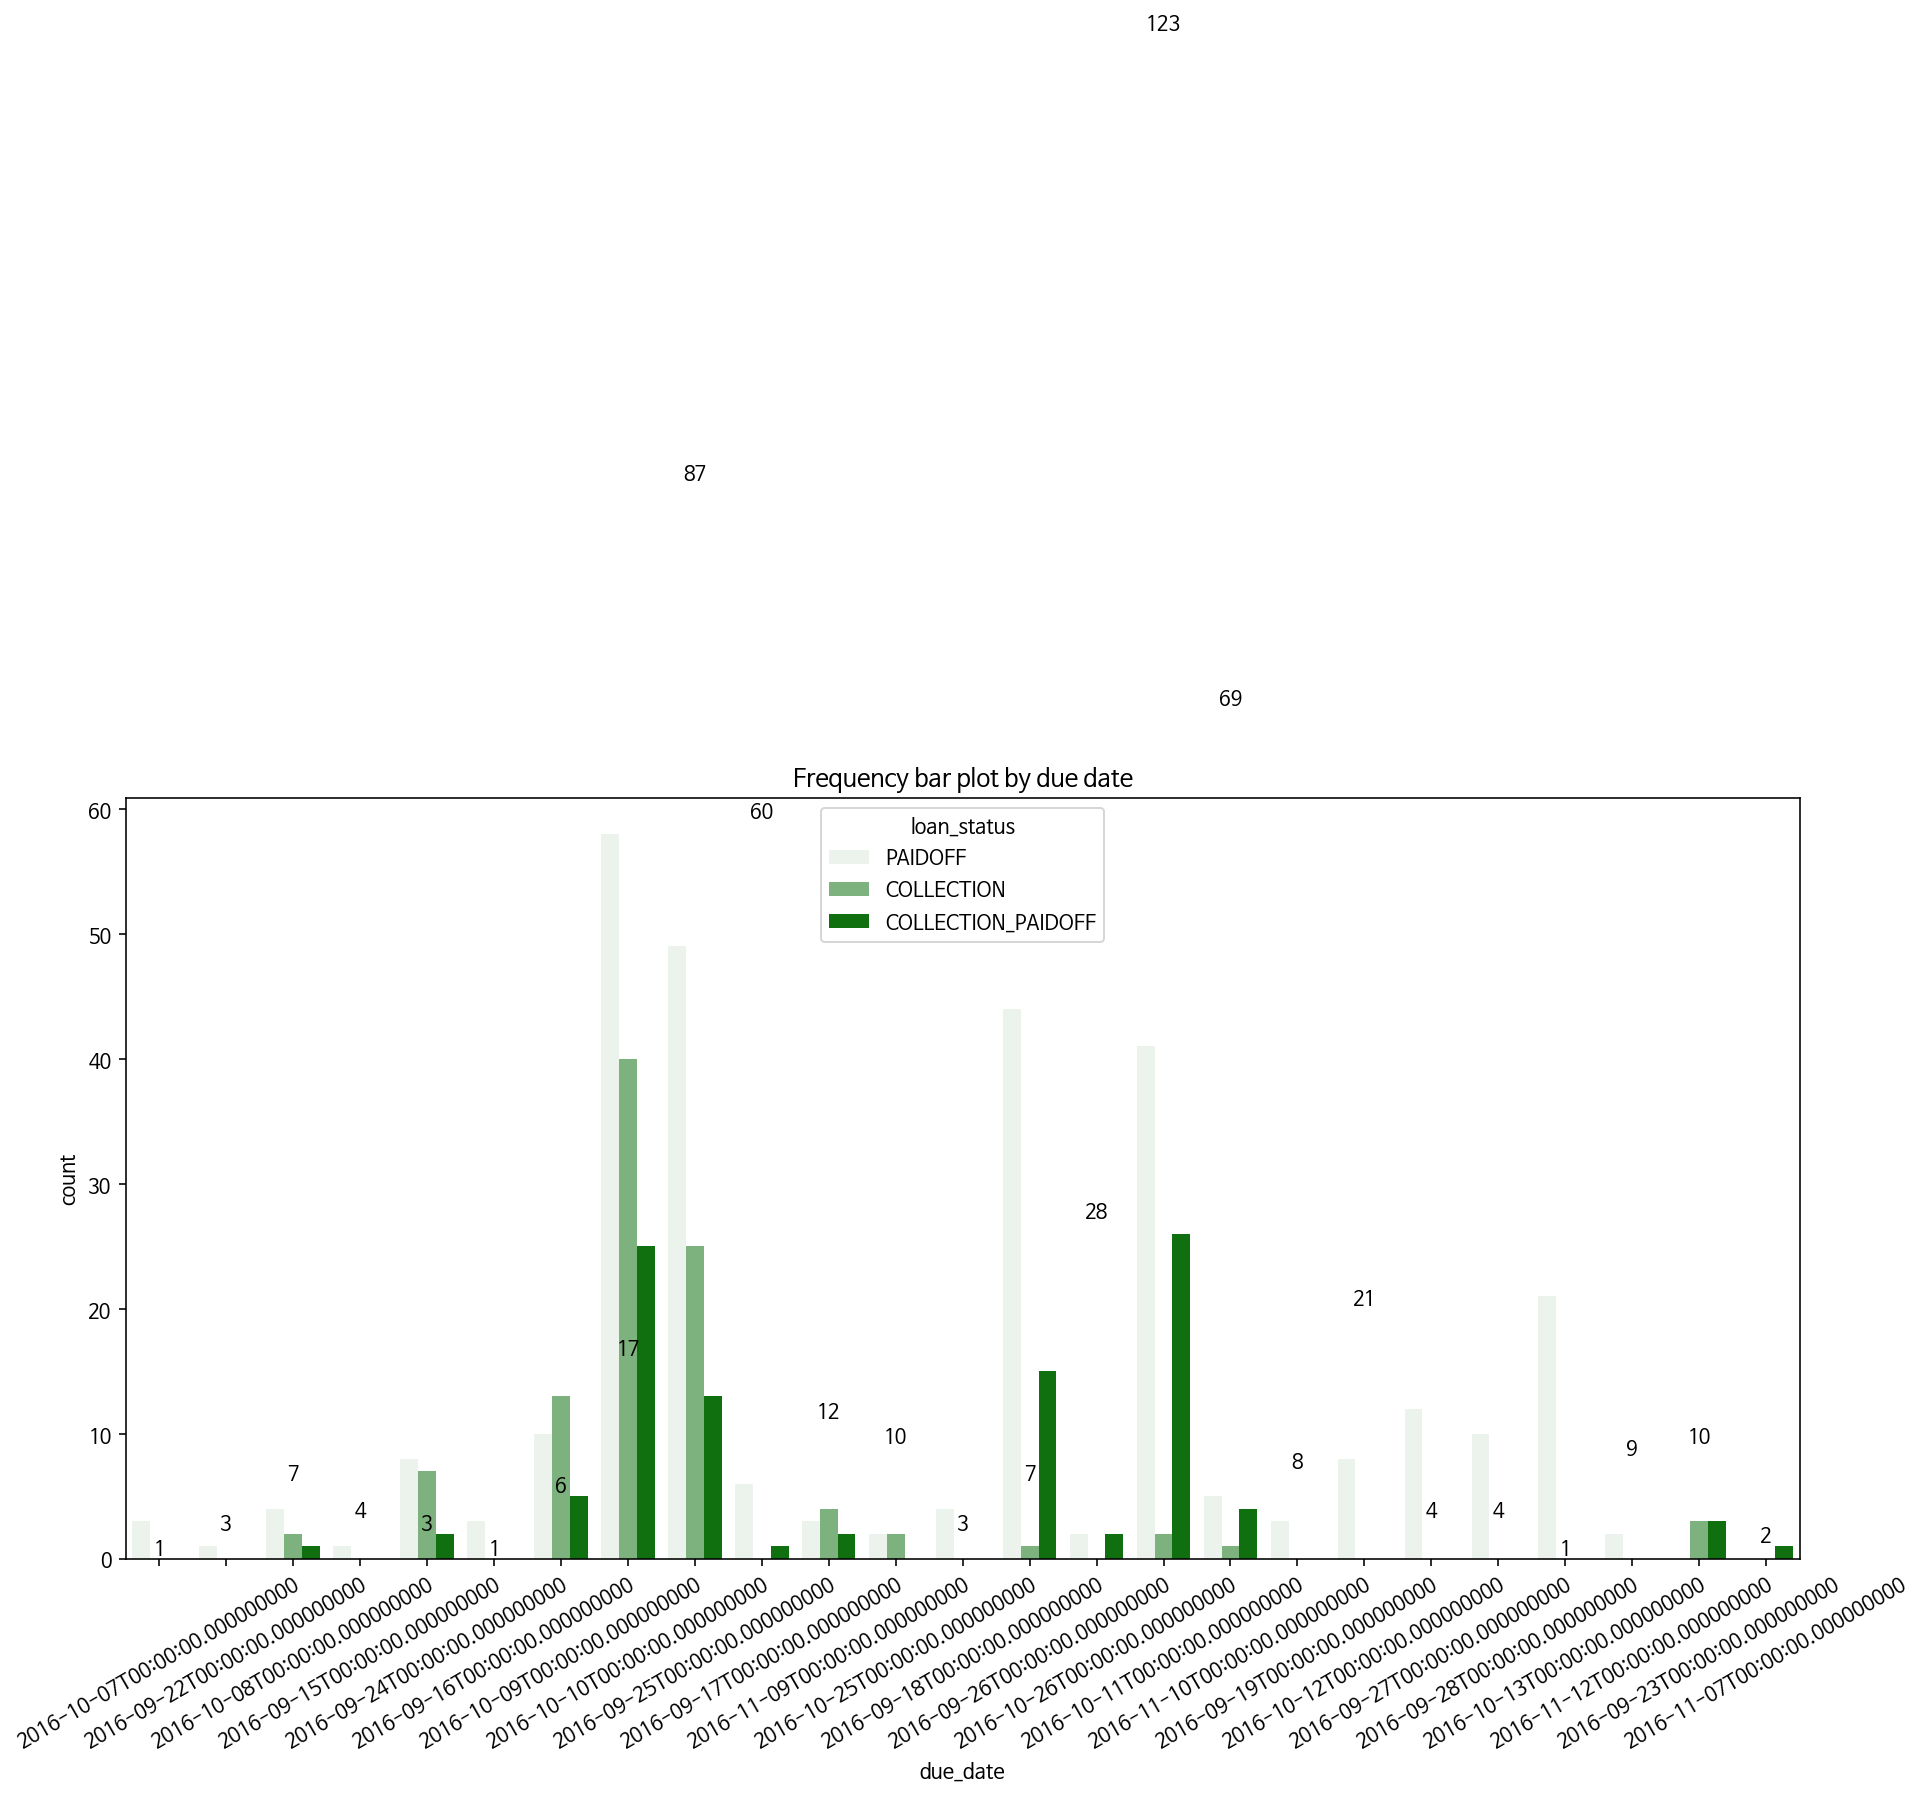

In [ ]:
# 데이터레이블 표시를 위한 연산
table_df2 = df.groupby(['due_date'])['loan_status'].count().reset_index()
# table_df.sort_values(ascending=False, by='M',inplace=True)


plt.figure(figsize=(15,7))
plt.title('Frequency bar plot by due date')
plt.xticks(rotation=30)
h = sns.countplot(data=df, x='due_date', hue='loan_status',color='Green')

index_no = 0
for i, val in table_df2.iterrows():
  due_date = val["due_date"]
  loan_status = val['loan_status']
  h.text(x=index_no, y=loan_status, s=loan_status, horizontalalignment='center',verticalalignment='center_baseline')
  # h.text(x=index_no, y=due_date, s=due_date, horizontalalignment='left', verticalalignment='top',fontsize=15)
  index_no = index_no + 1

In [ ]:
# df_loan['loan_status'] = (df_loan['loan_status'] =="PAIDOFF").astype('int')

# df_loan.head()

df_loan['loan_status'].value_counts()

1    300
0    200
Name: loan_status, dtype: int64

In [15]:
# # 변수변환하기
# from sklearn.preprocessing import LabelEncoder

# # # loan_status 2 = PAID OFF , 1 = COLLECTION , 0 = COLLECTION_PAID_OFF
# # le_loan = LabelEncoder()
# # le_loan.fit(df['loan_status'])
# # df['loan_status'] = le_loan.transform(df['loan_status'])

# # 성별  0 = male, 1 = female
# le_Gender = LabelEncoder()
# le_Gender.fit(df_loan['Gender'])
# df_loan['Gender'] = le_Gender.transform(df_loan['Gender'])

# # Education 0 = Bechalor, 1 = High School or Below, 2 = Master or Above ,3 = college
# le_edu = LabelEncoder()
# le_edu.fit(df_loan['education'])
# df_loan['education'] = le_edu.transform(df_loan['education'])


# # print('\n',le_loan.inverse_transform(df_loan['loan_status']))
# print('\n',le_Gender.inverse_transform(df_loan['Gender']))
# print('\n',le_edu.inverse_transform(df_loan['education']))
def format_features(df):
  features = ['loan_status','education','Gender']
  for feature in features:
    le = LabelEncoder()
    le.fit(df[feature])
    df[feature] = le.transform(df[features])
  return df


  

In [17]:
def transform_features(df):
  df = filnla(df)
  df = drop_features(df)
  df = format_features(df)
  return df
  

ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
target_df = df_loan['loan_status'].copy()
features_df = df_loan.drop(['loan_status','effective_date','due_date','date'],axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(features_df, target_df,
                                                    test_size = 0.2, random_state = 11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습 / 예측 / 평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 예측 정확도 : ',round(accuracy_score(y_test, dt_pred),4))

# RandomForestClassifier 학습 / 예측 / 평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 예측 정확도 : ',round(accuracy_score(y_test, rf_pred),4))

# LogisticRegreesion 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegreesion 예측 정확도 : ',round(accuracy_score(y_test, lr_pred),4))

DecisionTreeClassifier 예측 정확도 :  0.47
RandomForestClassifier 예측 정확도 :  0.5
LogisticRegreesion 예측 정확도 :  0.58
